<a href="https://colab.research.google.com/github/pedroallmeiida/econometria/blob/main/Exemplos%20no%20R/Exemplo4_modelo_reciproco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Recíproco

## Exemplo 4

Suponha agora que queremos conhecer a varição absoluta de Y da uma variação percentual de X. Neste exemplo vamos estudar o comportamento da mortalidade infantil com o Produto Nacional Bruto (PNB).

**Significado das Variáveis:**

- MI: Mortalidade Infantil
- PNBpe: Produto Nacional Bruto per capita
- TAF:Taxa de analfabetismo feminino (em %)
- TFT: taxa de fecundidade total

In [2]:
# Bibliotecas R
library(ggplot2)
library(readr)


Leitura do dataset

In [9]:
df = read.csv( "https://raw.githubusercontent.com/pedroallmeiida/econometria/refs/heads/main/Dados/dados_exemplo_mortalidade_infantil.csv" )
df

MI,TAF,PNBpc,TFT
<int>,<int>,<int>,<dbl>
128,37,1870,6.66
204,22,130,6.15
202,16,310,7.00
197,65,570,6.25
96,76,2050,3.81
209,26,200,6.44
170,45,670,6.19
240,29,300,5.89
241,11,120,5.89


In [79]:
lm_linlog<- lm( MI~ I(1/PNBpc) , data = df)
summary(lm_linlog)


Call:
lm(formula = MI ~ I(1/PNBpc), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-130.806  -36.410    2.871   31.686  132.801 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    81.79      10.83   7.551 2.38e-10 ***
I(1/PNBpc)  27273.17    3760.00   7.254 7.82e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56.33 on 62 degrees of freedom
Multiple R-squared:  0.4591,	Adjusted R-squared:  0.4503 
F-statistic: 52.61 on 1 and 62 DF,  p-value: 7.821e-10


**Intrepretação do modelo recíproco:**

A Equação do modelo predito é dada por:

$$
\widehat{MI}_i = 81,79 + 27.237 \, \frac{1}{PBNpc_i}
$$

em que as estimativas para o intercepto e coeficiente de regressão são dados respectivamente por, $\hat\beta_0 = 81,79$ e $\hat\beta_1 = 27.237$.

Seja $\hat\beta_0 = 81,79$, significa que a medida que o PNB per capita aumenta indefinidamente, a mortalidade infantil aproxima-se de cerca de 82 óbitos por mil habitantes.

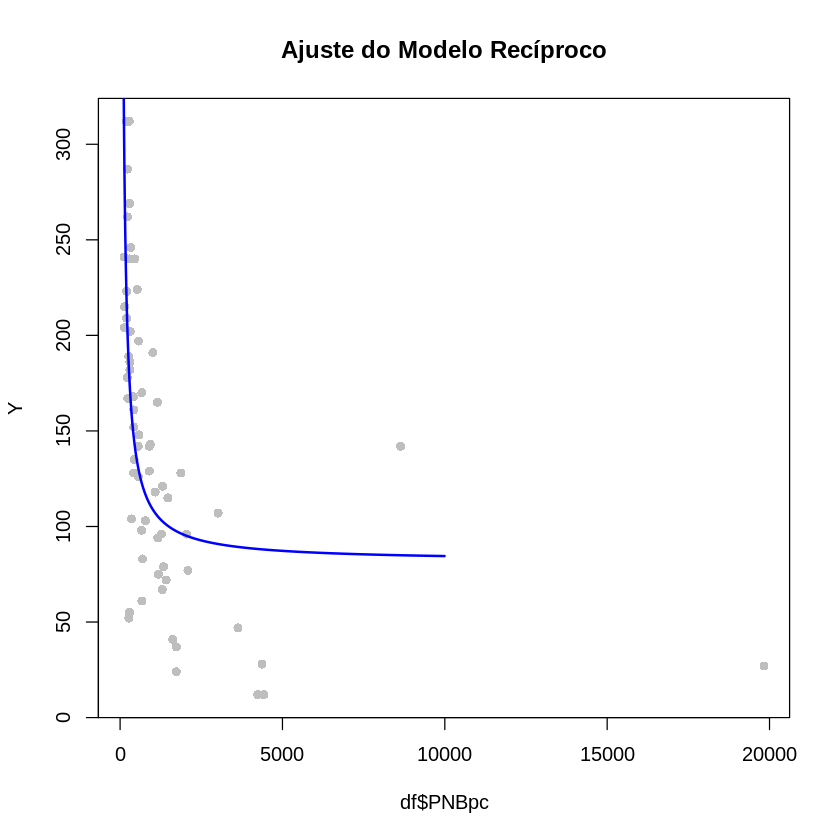

In [81]:
X_new = data.frame(PNBpc = seq(10:10000))
Y_pred = predict( lm_linlog, newdata = X_new)
plot(df$PNBpc , Y, pch = 16, col = "gray", main = "Ajuste do Modelo Recíproco")
lines(X_new$PNBpc, Y_pred, col = "blue", lwd = 2)



In [83]:
lm_linlog<- lm( MI~I(1/TAF), data = df)
summary(lm_linlog)


Call:
lm(formula = MI ~ I(1/TAF), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-106.083  -37.641   -4.887   37.729  135.932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    68.83      10.84   6.352 2.80e-08 ***
I(1/TAF)     2549.24     303.04   8.412 7.65e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.34 on 62 degrees of freedom
Multiple R-squared:  0.533,	Adjusted R-squared:  0.5255 
F-statistic: 70.76 on 1 and 62 DF,  p-value: 7.647e-12


**Intrepretação do modelo recíproco:**

A Equação do modelo predito é dada por:

$$
\widehat{MI}_i = 68,83 + 2549,24 \, \frac{1}{TAF_i}
$$

em que as estimativas para o intercepto e coeficiente de regressão são dados respectivamente por, $\hat\beta_0 = 68,83$ e $\hat\beta_1 = 2549,24$.

Seja $\hat\beta_0 = 68,83$, significa que a medida que a Taxa de analfabetismo feminino aumenta indefinidamente, a mortalidade infantil aproxima-se de cerca de 69 óbitos por mil habitantes.

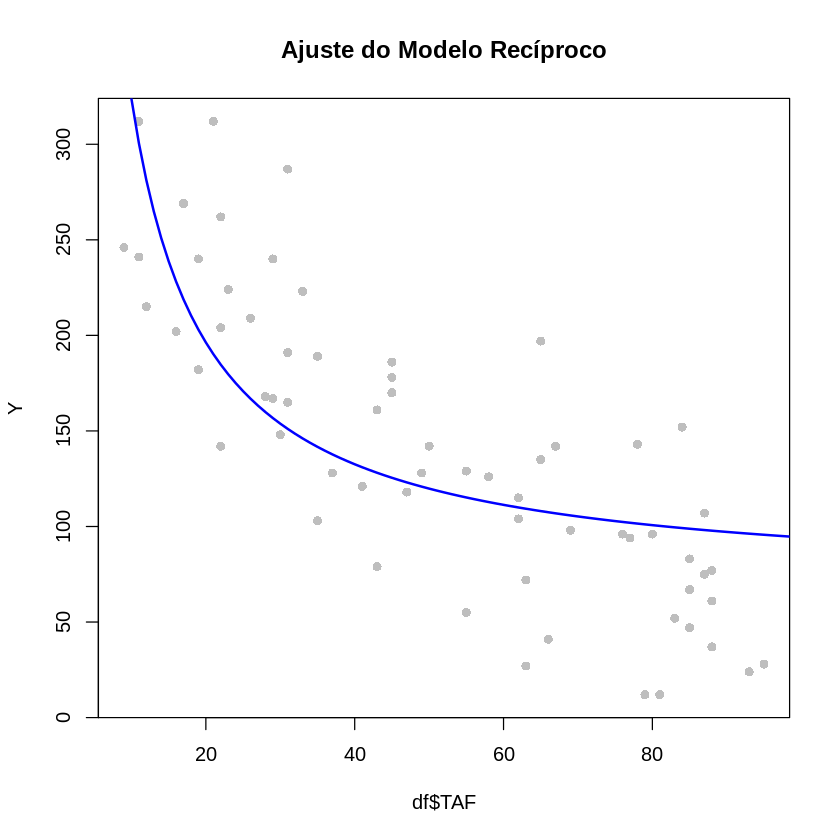

In [84]:
X_new = data.frame(TAF = seq(10:10000))
Y_pred = predict( lm_linlog, newdata = X_new)
plot(df$TAF , Y, pch = 16, col = "gray", main = "Ajuste do Modelo Recíproco")
lines(X_new$TAF, Y_pred, col = "blue", lwd = 2)